# Timeseries analysis with Prediction of Tobacco Usage Using Machine Learning

## Data Handling
Step 1: Load the Dataset

In [114]:
import pandas as pd

data = pd.read_csv("BRFSS_Prevalence_and_Trends_Data__Tobacco_Use_-_Four_Level_Smoking_Data_for_1995-2010.csv")

# Display the first few rows of the dataframe to understand its structure
print(data.head())


   index  Year        State Smoke everyday Smoke some days Former smoker  \
0      0  1996  Puerto Rico           9.4%            5.1%           16%   
1      1  1997  Puerto Rico           9.4%              5%         15.7%   
2      2  1998  Puerto Rico          10.1%            5.2%         16.8%   
3      3  1999  Puerto Rico           9.7%              4%         15.3%   
4      4  2000  Puerto Rico           9.2%            3.9%         15.2%   

  Never smoked     Location 1  
0        69.5%  Puerto Rico\n  
1        69.9%  Puerto Rico\n  
2        67.9%  Puerto Rico\n  
3          71%  Puerto Rico\n  
4        71.6%  Puerto Rico\n  


In [115]:
data.describe(include='all')


,index,Year,State,Smoke everyday,Smoke some days,Former smoker,Never smoked,Location 1
count,876.000000,876.000000,876,876,876,876,876,839
unique,NaN,NaN,56,187,65,169,208,55
top,NaN,NaN,Iowa,13.4%,5.1%,24.7%,51.6%,"Iowa\n(42.469390000048634, -93.81649000001335)"
freq,NaN,NaN,16,15,51,27,15,16
mean,437.500000,2002.591324,NaN,NaN,NaN,NaN,NaN,NaN
std,253.023714,4.593622,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1995.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,218.750000,1999.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,437.500000,2003.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,656.250000,2007.000000,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning


In [116]:
# Replace missing values in numerical columns with the median of that column
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col].fillna(data[col].median(), inplace=True)


In [117]:
data.dropna(inplace=True)


In [118]:
def percentage_to_float(x):
    return float(x.strip('%'))

columns_to_convert = ['Smoke everyday', 'Smoke some days', 'Former smoker', 'Never smoked']
for col in columns_to_convert:
    data[col] = data[col].apply(percentage_to_float)


In [119]:
# Check for duplicate rows
print(f"Number of duplicate rows: {data.duplicated().sum()}")

# Remove duplicate rows
data.drop_duplicates(inplace=True)


Number of duplicate rows: 0


In [120]:
# Convert 'Year' from object to integer if it's not already
data['Year'] = data['Year'].astype(int)


In [121]:
# Simple method to detect and remove outliers (Example for a 'Smoke everyday' column converted to floats)
Q1 = data['Smoke everyday'].quantile(0.25)
Q3 = data['Smoke everyday'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
data_filtered = data[(data['Smoke everyday'] >= lower_bound) & (data['Smoke everyday'] <= upper_bound)]


In [122]:
# Example: Create a new column for the total percentage of smokers
data['Total Smokers %'] = data['Smoke everyday'] + data['Smoke some days']
data.head()

,index,Year,State,Smoke everyday,Smoke some days,Former smoker,Never smoked,Location 1,Total Smokers %
0,0,1996,Puerto Rico,9.4,5.1,16.0,69.5,Puerto Rico\n,14.5
1,1,1997,Puerto Rico,9.4,5.0,15.7,69.9,Puerto Rico\n,14.4
2,2,1998,Puerto Rico,10.1,5.2,16.8,67.9,Puerto Rico\n,15.3
3,3,1999,Puerto Rico,9.7,4.0,15.3,71.0,Puerto Rico\n,13.7
4,4,2000,Puerto Rico,9.2,3.9,15.2,71.6,Puerto Rico\n,13.1


In [123]:
# Group data by 'Year' and get the average of 'Smoke everyday' percentage
yearly_smoking_avg = data.groupby('Year')['Smoke everyday'].mean().reset_index()
print(yearly_smoking_avg)


    Year  Smoke everyday
0   1995       20.018367
1   1996       19.637255
2   1997       18.950000
3   1998       18.492308
4   1999       18.063462
5   2000       17.557692
6   2001       17.233962
7   2002       17.918868
8   2003       17.013208
9   2004       15.646154
10  2005       15.226415
11  2006       14.790566
12  2007       14.590566
13  2008       13.645283
14  2009       13.161111
15  2010       12.875926


In [124]:
data.head()

,index,Year,State,Smoke everyday,Smoke some days,Former smoker,Never smoked,Location 1,Total Smokers %
0,0,1996,Puerto Rico,9.4,5.1,16.0,69.5,Puerto Rico\n,14.5
1,1,1997,Puerto Rico,9.4,5.0,15.7,69.9,Puerto Rico\n,14.4
2,2,1998,Puerto Rico,10.1,5.2,16.8,67.9,Puerto Rico\n,15.3
3,3,1999,Puerto Rico,9.7,4.0,15.3,71.0,Puerto Rico\n,13.7
4,4,2000,Puerto Rico,9.2,3.9,15.2,71.6,Puerto Rico\n,13.1


# Exploratory Data Analysis

# Distribution of Daily Smokers Over the Years
Analyzed how the distribution of daily smokers has changed over the years

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:269: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  baselines[cols] = curves[cols].shift(1, axis=1).fillna(0)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


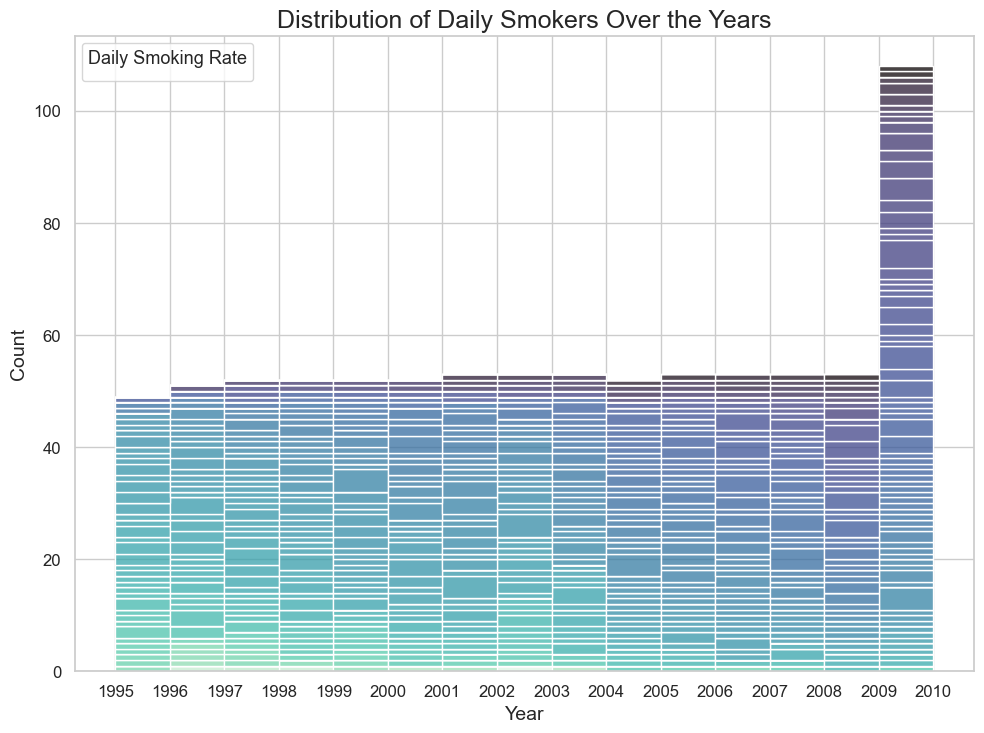

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns



# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Increase the figure size for better readability
plt.figure(figsize=(10, 8))

# Plot the histogram with thicker bars for better clarity
sns.histplot(data=data, x='Year', hue='Smoke everyday', multiple='stack',
             palette='mako', binwidth=1, element="bars", stat="count")

# Set plot title and labels for clarity
plt.title('Distribution of Daily Smokers Over the Years', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Set ticks for each year and align them to the center of each bar group
plt.xticks(data['Year'].unique(), horizontalalignment='center', fontsize=12)

# Set the y-ticks font size
plt.yticks(fontsize=12)

# Adjust legend for readability
plt.legend(title='Daily Smoking Rate', title_fontsize='13', fontsize='11')

# Set a tight layout to ensure no overlap and adjust the bottom margin to prevent cutting off x labels
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)

# Show the plot
plt.show()





# Box Plot of Smokers by Year
Identify outliers and see the spread of daily smokers each year.

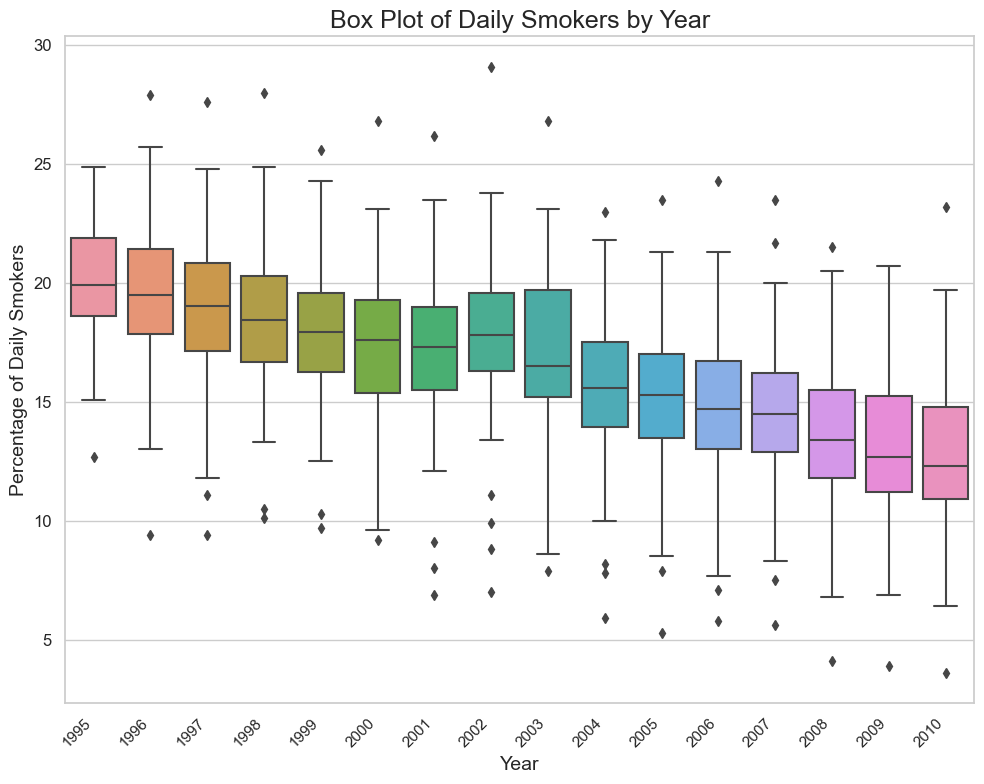

,index,Year,State,Smoke everyday,Smoke some days,Former smoker,Never smoked,Location 1,Total Smokers %
0,0,1996,Puerto Rico,9.4,5.1,16.0,69.5,Puerto Rico\n,14.5
1,1,1997,Puerto Rico,9.4,5.0,15.7,69.9,Puerto Rico\n,14.4
2,2,1998,Puerto Rico,10.1,5.2,16.8,67.9,Puerto Rico\n,15.3
3,3,1999,Puerto Rico,9.7,4.0,15.3,71.0,Puerto Rico\n,13.7
4,4,2000,Puerto Rico,9.2,3.9,15.2,71.6,Puerto Rico\n,13.1


In [126]:


# Increase the figure size for better readability
plt.figure(figsize=(10, 8))

# Create the boxplot
sns.boxplot(x='Year', y='Smoke everyday', data=data)

# Rotate the x-axis tick labels for better visibility and alignment
plt.xticks(rotation=45, ha='right')

# Increase font size for better readability
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Daily Smokers', fontsize=14)
plt.title('Box Plot of Daily Smokers by Year', fontsize=18)

# Adjust y-ticks font size
plt.yticks(fontsize=12)

# Ensure all elements fit within the figure area
plt.tight_layout()

# Display the plot
plt.show()

data.head()


# Correlation Heatmap

Determined if there's any correlation between the percentages of different types of smokers.

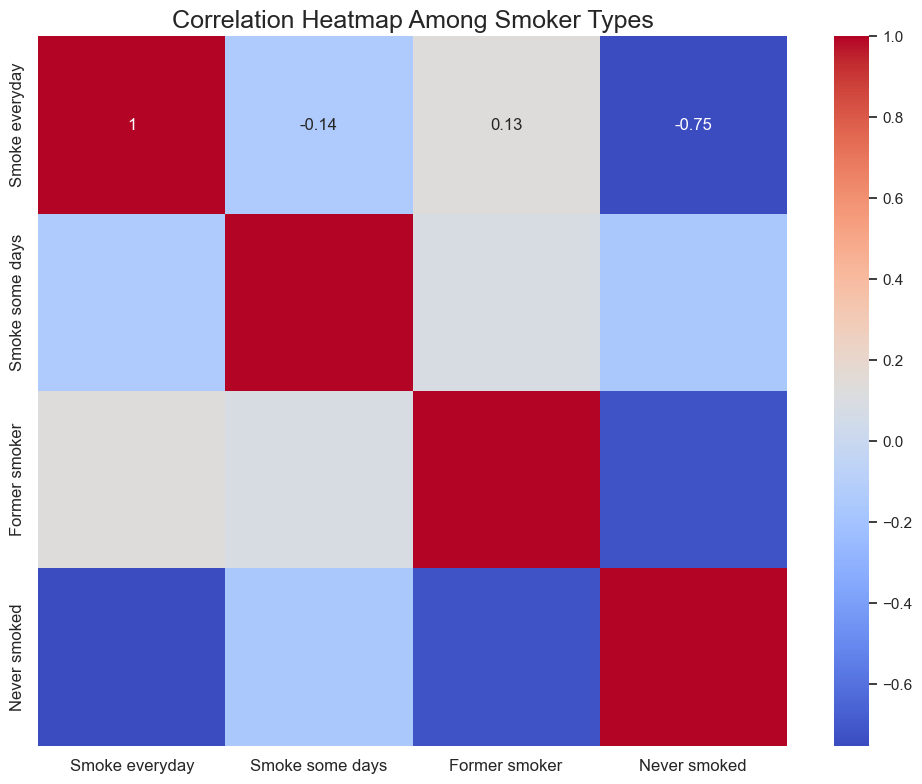

In [127]:

# Set the aesthetic style of the plots
sns.set_style('white')

# Increase the figure size for better readability
plt.figure(figsize=(10, 8))

# Create the heatmap with a specified color map and larger annotation font size
sns.heatmap(data[['Smoke everyday', 'Smoke some days', 'Former smoker', 'Never smoked']].corr(),
            annot=True, cmap='coolwarm', annot_kws={"size": 12})

# Increase font size for better readability
plt.title('Correlation Heatmap Among Smoker Types', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ensure all elements fit within the figure area
plt.tight_layout()

# Display the plot
plt.show()



# Average Smoker Types by State

Observed which states have the highest average percentage of daily and occasional smokers.

<Figure size 1000x5000 with 0 Axes>

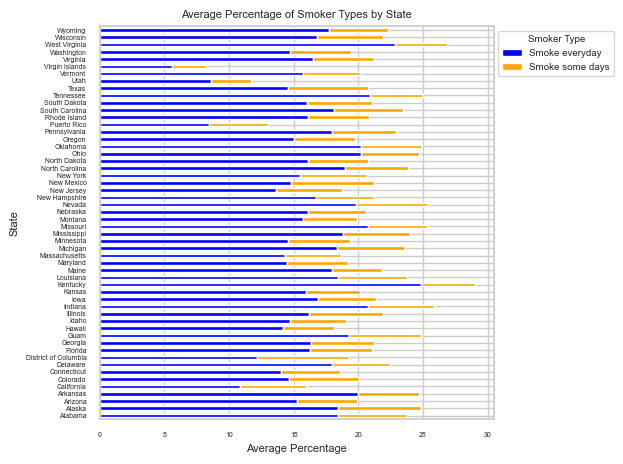

In [129]:

import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Increase the height of the figure to space out the states
plt.figure(figsize=(10, 50))  # You may need to adjust this height to suit your screen resolution

# Create the horizontal bar plot
state_averages = data.groupby('State')[['Smoke everyday', 'Smoke some days']].mean().reset_index()
state_averages.plot(x='State', y=['Smoke everyday', 'Smoke some days'], kind='barh', stacked=True, color=['blue', 'orange'])

# Reduce font size if the chart is too large for the screen, to accommodate more space between states
plt.yticks(fontsize=5)
plt.xticks(fontsize=5)

# Increase font size for better readability of the x-axis and title
plt.xlabel('Average Percentage', fontsize=8)
plt.ylabel('State', fontsize=8)
plt.title('Average Percentage of Smoker Types by State', fontsize=8)

# Adjust the legend for better readability
plt.legend(title='Smoker Type', title_fontsize='7', fontsize='7', bbox_to_anchor=(1.0, 1.0))

# Ensure all elements fit within the figure area
plt.tight_layout()

# Show the plot
plt.show()




# Trends Over Time for Each State
Plotted the trends of daily smokers over time for selected states.

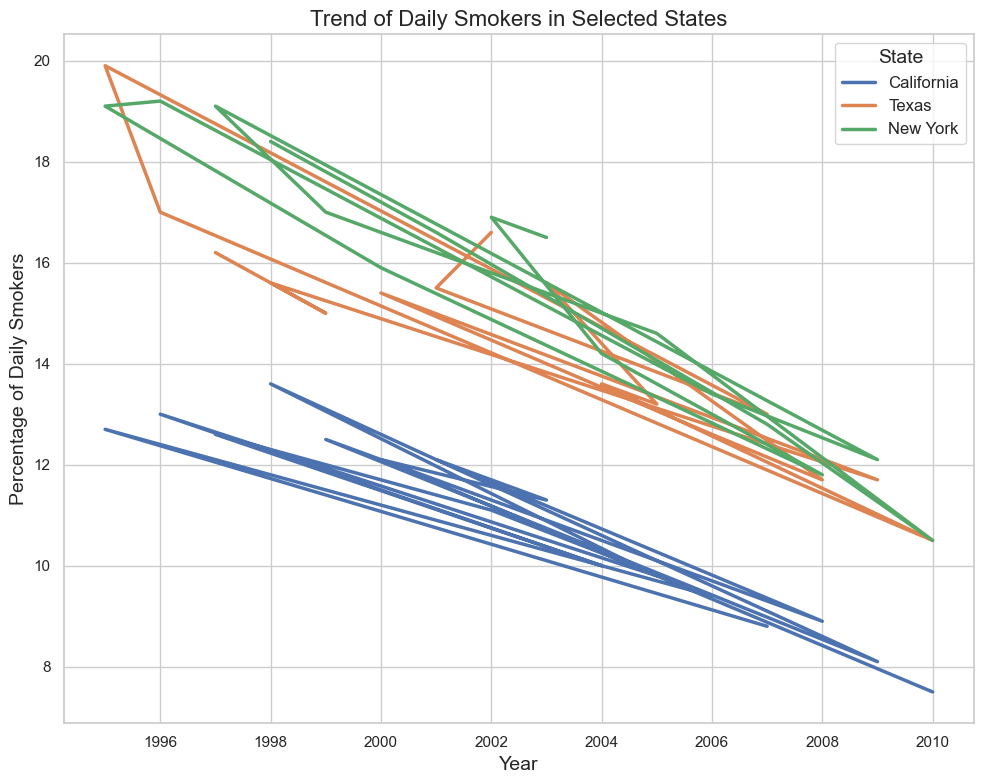

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Increase the figure size for better readability
plt.figure(figsize=(10, 8))

selected_states = ['California', 'Texas', 'New York']

# Plot the trend of daily smokers for selected states with increased line width
for state in selected_states:
    state_data = data[data['State'] == state]
    plt.plot(state_data['Year'], state_data['Smoke everyday'], label=state, linewidth=2.5)

# Add a title and axis labels with increased font size
plt.title('Trend of Daily Smokers in Selected States', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Daily Smokers', fontsize=14)

# Add a legend with increased font size and no overlapping with the lines
plt.legend(title='State', fontsize=12, title_fontsize=14, loc='best')

# Add a grid for better readability
plt.grid(True)

# Ensure all elements fit within the figure area
plt.tight_layout()

# Display the plot
plt.show()


# Pair Plot
Visualized the relationships between all types of smokers across states.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

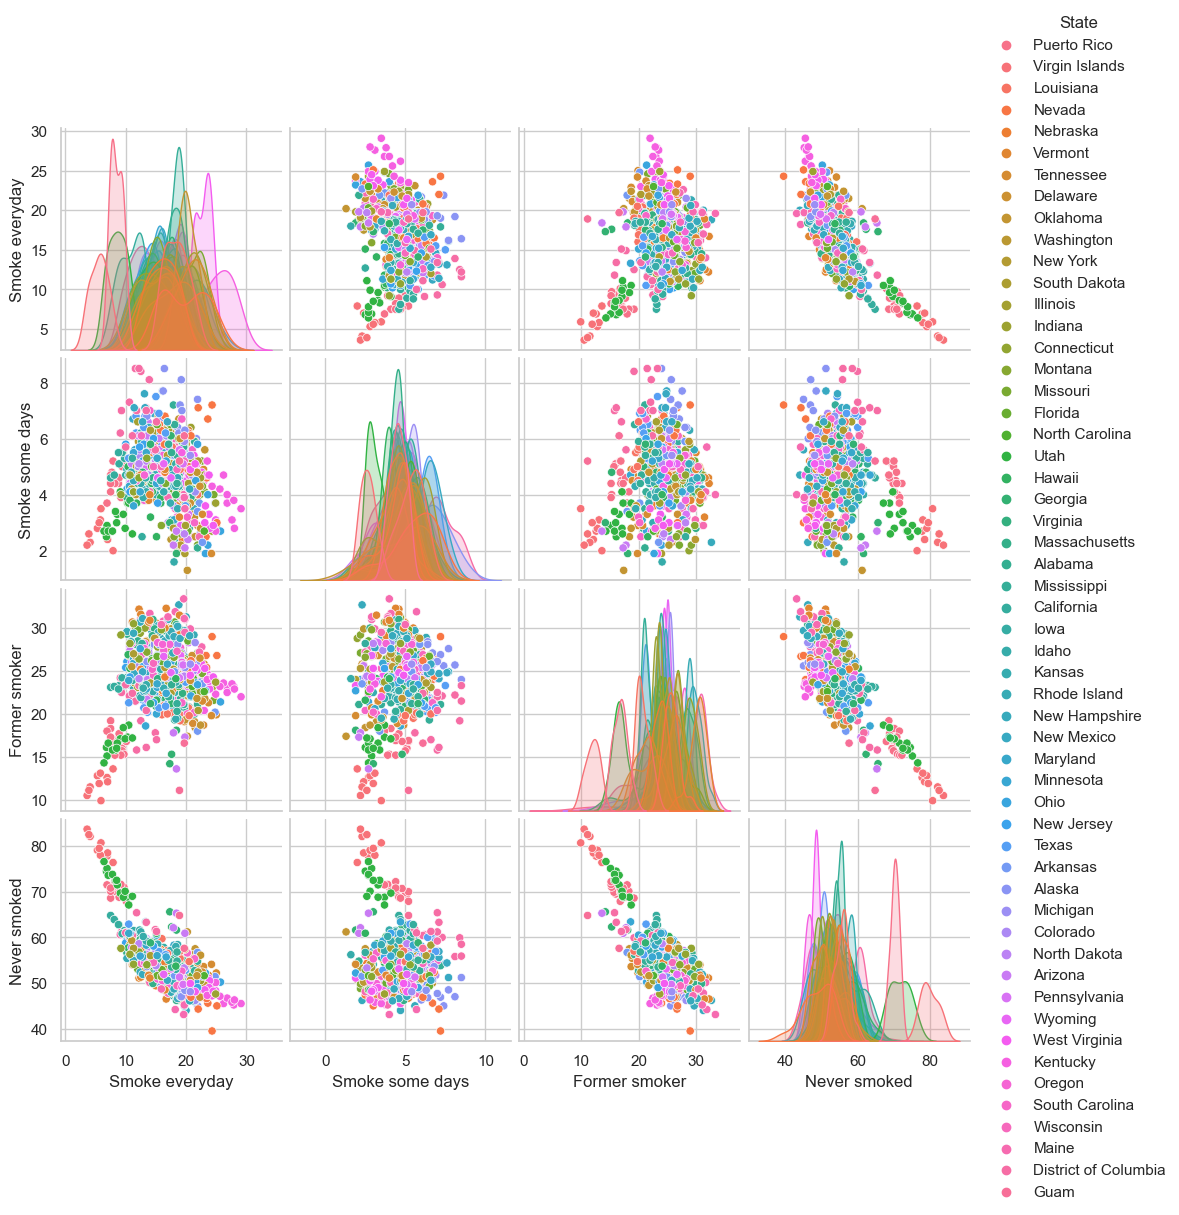

In [131]:

sns.pairplot(data[['Smoke everyday', 'Smoke some days', 'Former smoker', 'Never smoked', 'State']], hue='State')
plt.show()




# Distribution of Former Smokers
Inspected the distribution of former smokers across all years.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


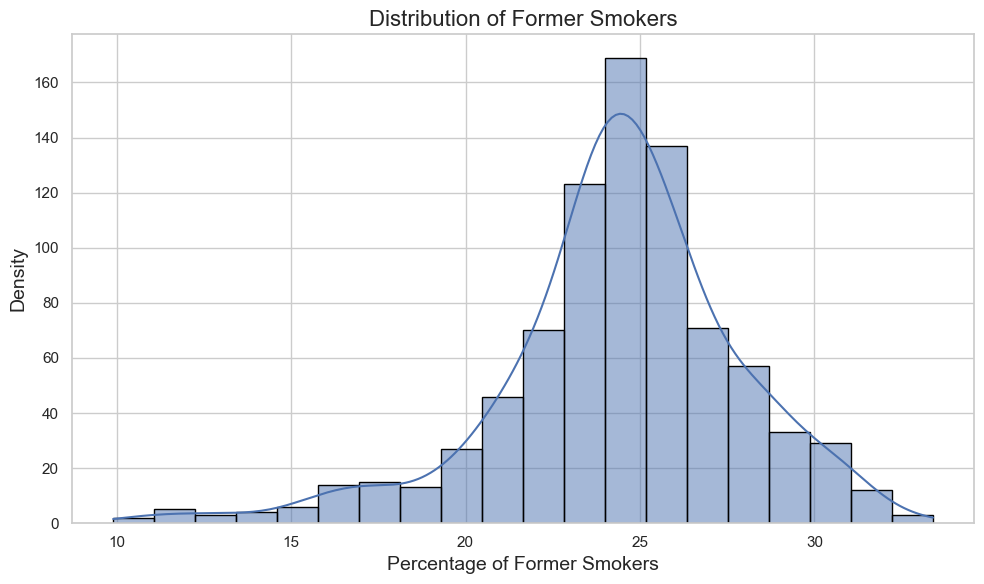

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Increase the figure size for better readability
plt.figure(figsize=(10, 6))

# Create the histogram with a kernel density estimate (KDE)
sns.histplot(data=data, x='Former smoker', bins=20, kde=True, edgecolor='black')

# Add titles and labels with larger font sizes
plt.title('Distribution of Former Smokers', fontsize=16)
plt.xlabel('Percentage of Former Smokers', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Ensure all elements fit within the figure area
plt.tight_layout()

# Display the plot
plt.show()



# Line Plot of Never Smokers Trend
Examined the trend of individuals who have never smoked over the years.

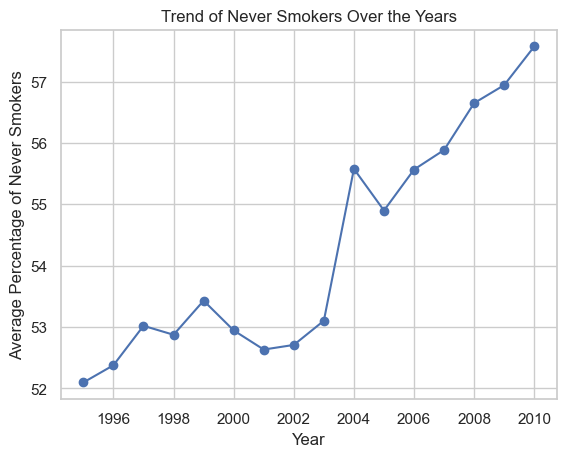

In [133]:
data.groupby('Year')['Never smoked'].mean().plot(kind='line', marker='o')
plt.title('Trend of Never Smokers Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Percentage of Never Smokers')
plt.grid(True)
plt.show()


# Scatter Plot Between Daily and Occasional Smokers
Analyzed the relationship between daily and occasional smokers.

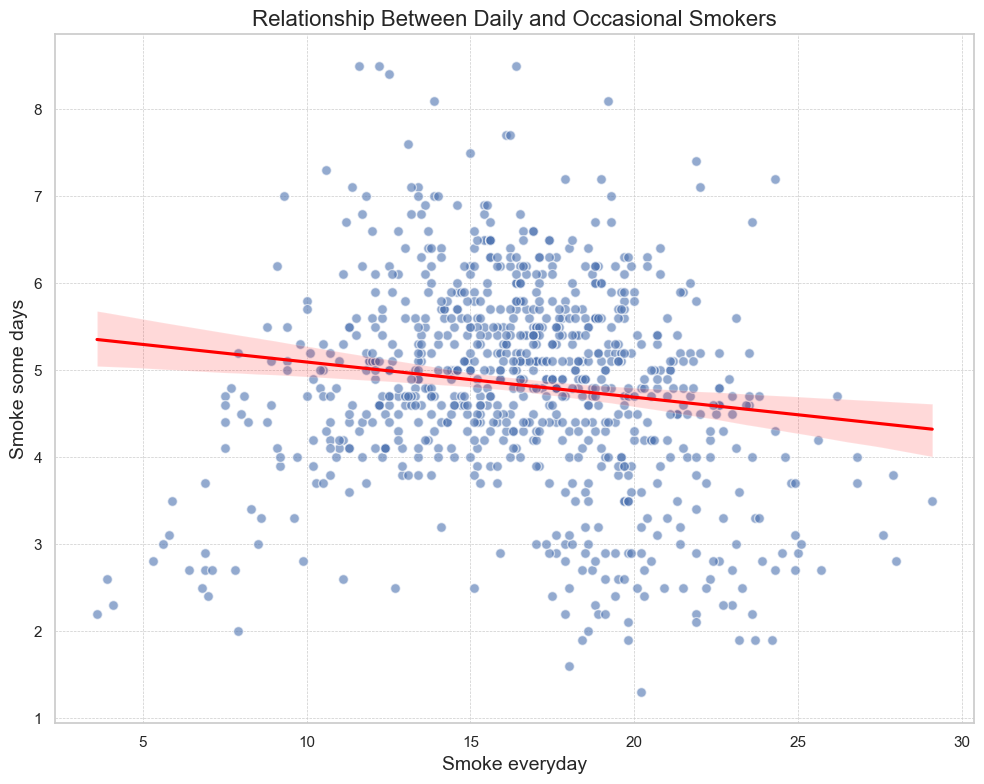

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Increase the size of the figure for better readability
plt.figure(figsize=(10, 8))

# Create the scatter plot with adjusted point size and transparency
plt.scatter(data['Smoke everyday'], data['Smoke some days'], alpha=0.6, edgecolor='w', s=50)

# Add a grid for easier reading
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add titles and labels with larger font sizes
plt.title('Relationship Between Daily and Occasional Smokers', fontsize=16)
plt.xlabel('Percentage of Daily Smokers', fontsize=14)
plt.ylabel('Percentage of Occasional Smokers', fontsize=14)

# Optionally, fit and plot a regression line
sns.regplot(x='Smoke everyday', y='Smoke some days', data=data, scatter=False, color='red')

# Ensure all elements fit within the figure area
plt.tight_layout()

# Display the plot
plt.show()


## Pre-processing of Dataset

In [135]:
# Drop columns that are not features or targets
data = data.drop(['index', 'Location 1'], axis=1)

In [136]:
data.head()

,Year,State,Smoke everyday,Smoke some days,Former smoker,Never smoked,Total Smokers %
0,1996,Puerto Rico,9.4,5.1,16.0,69.5,14.5
1,1997,Puerto Rico,9.4,5.0,15.7,69.9,14.4
2,1998,Puerto Rico,10.1,5.2,16.8,67.9,15.3
3,1999,Puerto Rico,9.7,4.0,15.3,71.0,13.7
4,2000,Puerto Rico,9.2,3.9,15.2,71.6,13.1


In [137]:
# Assuming 'data' is your DataFrame
data = data.drop('Total Smokers %', axis=1)


In [138]:
# One-hot encode the 'State' column
data_encoded = pd.get_dummies(data, columns=['State'], prefix='', prefix_sep='')


In [139]:
# One-hot encode the 'State' column
data_encoded = pd.get_dummies(data, columns=['State'], prefix='', prefix_sep='')
data.head()

,Year,State,Smoke everyday,Smoke some days,Former smoker,Never smoked
0,1996,Puerto Rico,9.4,5.1,16.0,69.5
1,1997,Puerto Rico,9.4,5.0,15.7,69.9
2,1998,Puerto Rico,10.1,5.2,16.8,67.9
3,1999,Puerto Rico,9.7,4.0,15.3,71.0
4,2000,Puerto Rico,9.2,3.9,15.2,71.6


In [140]:
# Define the features (X) and the targets (y)
X = data_encoded.drop(['Smoke everyday', 'Smoke some days', 'Former smoker', 'Never smoked'], axis=1)
y = data_encoded[['Smoke everyday', 'Smoke some days', 'Former smoker', 'Never smoked']]


In [141]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [142]:
data.head()

,Year,State,Smoke everyday,Smoke some days,Former smoker,Never smoked
0,1996,Puerto Rico,9.4,5.1,16.0,69.5
1,1997,Puerto Rico,9.4,5.0,15.7,69.9
2,1998,Puerto Rico,10.1,5.2,16.8,67.9
3,1999,Puerto Rico,9.7,4.0,15.3,71.0
4,2000,Puerto Rico,9.2,3.9,15.2,71.6


## Decision Trees

In [143]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

# Assume 'data' is your DataFrame with the structure as shown

# Step 1: One-Hot Encoding of 'State' column
encoder = OneHotEncoder()
state_encoded = encoder.fit_transform(data[['State']]).toarray()
state_columns = encoder.get_feature_names_out(['State'])
state_df = pd.DataFrame(state_encoded, columns=state_columns)

# Merge the one-hot encoded states back with the original data
data_preprocessed = pd.concat([data.drop('State', axis=1).reset_index(drop=True), state_df], axis=1)

# Define the feature and target columns
features = ['Year'] + list(state_columns)
targets = ['Smoke everyday', 'Smoke some days', 'Former smoker', 'Never smoked']

# Split the data into features (X) and targets (y)
X = data_preprocessed[features]
y = data_preprocessed[targets]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
dt_regressor = DecisionTreeRegressor(random_state=42)

# Create a dictionary of all values we want to test for n_estimators
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Use GridSearch to test all values for n_estimators
dt_gscv = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit model to training data
dt_gscv.fit(X_train, y_train)

# Save the best model
best_dt_regressor = dt_gscv.best_estimator_

# Predictions on the test set using the best model
predictions_dt = best_dt_regressor.predict(X_test)

# Metrics evaluation
mse_dt = mean_squared_error(y_test, predictions_dt)
r2_dt = r2_score(y_test, predictions_dt)
mae_dt = mean_absolute_error(y_test, predictions_dt)
mape_dt = mean_absolute_percentage_error(y_test, predictions_dt)

print("Decision Tree Regression Metrics Evaluation (Best Model):")
print(f"Mean Squared Error: {mse_dt}")
print(f"R^2 Score: {r2_dt}")
print(f"Mean Absolute Error: {mae_dt}")
print(f"Mean Absolute Percentage Error: {mape_dt}")

# Step 2: Preparing new_data for prediction
# Initialize with zeros for all state columns
new_data = pd.DataFrame(0, index=[0], columns=state_columns)

# Add the 'Year' for which you want to make the prediction
new_data = pd.concat([pd.DataFrame({'Year': [2025]}), new_data], axis=1)

# Set the column for Puerto Rico to 1
new_data['State_Puerto Rico'] = 1

# Ensure the order of columns matches the training data
new_data = new_data[features]

# Make predictions using the best Decision Tree model
predictions_new_dt = best_dt_regressor.predict(new_data)

# Transform predictions into a DataFrame
predictions_new_dt_df = pd.DataFrame(predictions_new_dt, columns=targets)

print("Predictions from Decision Tree Regression for the new data (Best Model):")
print(predictions_new_dt_df)



/opt/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anacond

Decision Tree Regression Metrics Evaluation (Best Model):
Mean Squared Error: 3.0345045811231244
R^2 Score: 0.6638803711117757
Mean Absolute Error: 1.2856430697278909
Mean Absolute Percentage Error: 0.08344957754518424
Predictions from Decision Tree Regression for the new data (Best Model):
   Smoke everyday  Smoke some days  Former smoker  Never smoked
0            7.35            4.225           18.2         70.25


## Training with RandomForestRegressor

In [144]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

# Initialize the MultiOutputRegressor with RandomForestRegressor
rf_regressor = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

## Predictions with RandomForestRegressor

In [145]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

# Assuming 'data' is your DataFrame with the structure as shown

# Step 1: One-Hot Encoding of 'State' column
encoder = OneHotEncoder()
state_encoded = encoder.fit_transform(data[['State']]).toarray()
state_columns = encoder.get_feature_names_out(['State'])
state_df = pd.DataFrame(state_encoded, columns=state_columns)

# Merge the one-hot encoded states back with the original data
data_preprocessed = pd.concat([data.drop('State', axis=1).reset_index(drop=True), state_df], axis=1)

# Define the feature and target columns
features = ['Year'] + list(state_columns)
targets = ['Smoke everyday', 'Smoke some days', 'Former smoker', 'Never smoked']

# Split the data into features (X) and targets (y)
X = data_preprocessed[features]
y = data_preprocessed[targets]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Setup GridSearchCV
param_grid = {
    'estimator__n_estimators': [50, 100, 200],  # Number of trees in the forest
    'estimator__max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'estimator__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'estimator__min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

# Create the MultiOutputRegressor with RandomForestRegressor
rf_regressor = MultiOutputRegressor(RandomForestRegressor(random_state=42))

# Use GridSearch to find the best parameters
grid_search = GridSearchCV(rf_regressor, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

# Get the best estimator
best_rf_regressor = grid_search.best_estimator_

# Predictions on the test set using the best parameters
predictions_rf = best_rf_regressor.predict(X_test)

# Metrics evaluation
mse_rf = mean_squared_error(y_test, predictions_rf)
r2_rf = r2_score(y_test, predictions_rf)
mae_rf = mean_absolute_error(y_test, predictions_rf)
mape_rf = mean_absolute_percentage_error(y_test, predictions_rf)

print("RandomForestRegressor Metrics Evaluation (Best Model):")
print(f"Mean Squared Error: {mse_rf}")
print(f"R^2 Score: {r2_rf}")
print(f"Mean Absolute Error: {mae_rf}")
print(f"Mean Absolute Percentage Error: {mape_rf}")

# Step 2: Creating a new_data DataFrame for making predictions
# Initialize with zeros for all state columns
new_data = pd.DataFrame(0, index=[0], columns=state_columns)

# Add the 'Year' for which you want to make the prediction
new_data = pd.concat([pd.DataFrame({'Year': [2025]}), new_data], axis=1)

# Set the column for Puerto Rico to 1
new_data['State_Puerto Rico'] = 1

# Ensure the order of columns matches the training data
new_data = new_data[features]

# Make predictions using the best model
predictions_new_rf = best_rf_regressor.predict(new_data)

# Transform predictions into a DataFrame
predictions_new_rf_df = pd.DataFrame(predictions_new_rf, columns=targets)

print("Predictions from RandomForestRegressor for the new data (Best Model):")
print(predictions_new_rf_df)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END estimator__max_depth=None, estimator__min_samples_leaf=1, estimator__min_samples_split=2, estimator__n_estimators=50; total time=   0.3s
[CV] END estimator__max_depth=None, estimator__min_samples_leaf=1, estimator__min_samples_split=2, estimator__n_estimators=50; total time=   0.3s
[CV] END estimator__max_depth=None, estimator__min_samples_leaf=1, estimator__min_samples_split=2, estimator__n_estimators=50; total time=   0.3s
[CV] END estimator__max_depth=None, estimator__min_samples_leaf=1, estimator__min_samples_split=2, estimator__n_estimators=100; total time=   0.5s
[CV] END estimator__max_depth=None, estimator__min_samples_leaf=1, estimator__min_samples_split=2, estimator__n_estimators=100; total time=   0.5s
[CV] END estimator__max_depth=None, estimator__min_samples_leaf=1, estimator__min_samples_split=2, estimator__n_estimators=100; total time=   0.5s
[CV] END estimator__max_depth=None, estimator__min_samples

## Support Vector Regression Model

In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

# Assume 'data' is your DataFrame with the structure as shown

# Step 1: One-Hot Encoding of 'State' column
encoder = OneHotEncoder()
state_encoded = encoder.fit_transform(data[['State']]).toarray()
state_columns = encoder.get_feature_names_out(['State'])
state_df = pd.DataFrame(state_encoded, columns=state_columns)

# Merge the one-hot encoded states back with the original data
data_preprocessed = pd.concat([data.drop('State', axis=1).reset_index(drop=True), state_df], axis=1)

# Define the feature and target columns
features = ['Year'] + list(state_columns)
targets = ['Smoke everyday', 'Smoke some days', 'Former smoker', 'Never smoked']

# Split the data into features (X) and targets (y)
X = data_preprocessed[features]
y = data_preprocessed[targets]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the base SVR model
base_svr = SVR(kernel='rbf')

# Create a MultiOutputRegressor with GridSearchCV
svm_regressor = MultiOutputRegressor(base_svr)

# Define the parameter grid
param_grid = {
    'estimator__C': [0.1, 1, 10, 100],  # Regularization parameter
    'estimator__gamma': ['scale', 'auto', 0.01, 0.1, 1],  # Kernel coefficient
    'estimator__epsilon': [0.01, 0.1, 0.2]  # Epsilon in the epsilon-SVR model
}

# Setup GridSearchCV to find the best parameters
grid_search = GridSearchCV(svm_regressor, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

# Get the best estimator
best_svm_regressor = grid_search.best_estimator_

# Predictions on the test set using the best parameters
predictions_svm_test = best_svm_regressor.predict(X_test)

# Metrics evaluation
mse_svm = mean_squared_error(y_test, predictions_svm_test)
r2_svm = r2_score(y_test, predictions_svm_test)
mae_svm = mean_absolute_error(y_test, predictions_svm_test)
mape_svm = mean_absolute_percentage_error(y_test, predictions_svm_test)

print("Support Vector Regression Metrics Evaluation (Best Model):")
print(f"Mean Squared Error: {mse_svm}")
print(f"R^2 Score: {r2_svm}")
print(f"Mean Absolute Error: {mae_svm}")
print(f"Mean Absolute Percentage Error: {mape_svm}")

# Step 2: Preparing new_data for prediction
# Initialize with zeros for all state columns
new_data = pd.DataFrame(0, index=[0], columns=state_columns)

# Add the 'Year' for which you want to make the prediction
new_data = pd.concat([pd.DataFrame({'Year': [2025]}), new_data], axis=1)

# Set the column for Puerto Rico to 1
new_data['State_Puerto Rico'] = 1

# Ensure the order of columns matches the training data
new_data = new_data[features]

# Make predictions using the best SVR model
predictions_svm = best_svm_regressor.predict(new_data)

# Transform predictions into a DataFrame
predictions_svm_df = pd.DataFrame(predictions_svm, columns=targets)

print("Predictions from Support Vector Regression for the new data (Best Model):")
print(predictions_svm_df)


Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV] END estimator__C=0.1, estimator__epsilon=0.01, estimator__gamma=scale; total time=   0.1s
[CV] END estimator__C=0.1, estimator__epsilon=0.01, estimator__gamma=scale; total time=   0.1s
[CV] END estimator__C=0.1, estimator__epsilon=0.01, estimator__gamma=scale; total time=   0.1s
[CV] END estimator__C=0.1, estimator__epsilon=0.01, estimator__gamma=auto; total time=   0.1s
[CV] END estimator__C=0.1, estimator__epsilon=0.01, estimator__gamma=auto; total time=   0.1s
[CV] END estimator__C=0.1, estimator__epsilon=0.01, estimator__gamma=auto; total time=   0.1s
[CV] END estimator__C=0.1, estimator__epsilon=0.01, estimator__gamma=0.01; total time=   0.1s
[CV] END estimator__C=0.1, estimator__epsilon=0.01, estimator__gamma=0.01; total time=   0.1s
[CV] END estimator__C=0.1, estimator__epsilon=0.01, estimator__gamma=0.01; total time=   0.1s
[CV] END estimator__C=0.1, estimator__epsilon=0.01, estimator__gamma=0.1; total time=   0

## Comparitive Analysis

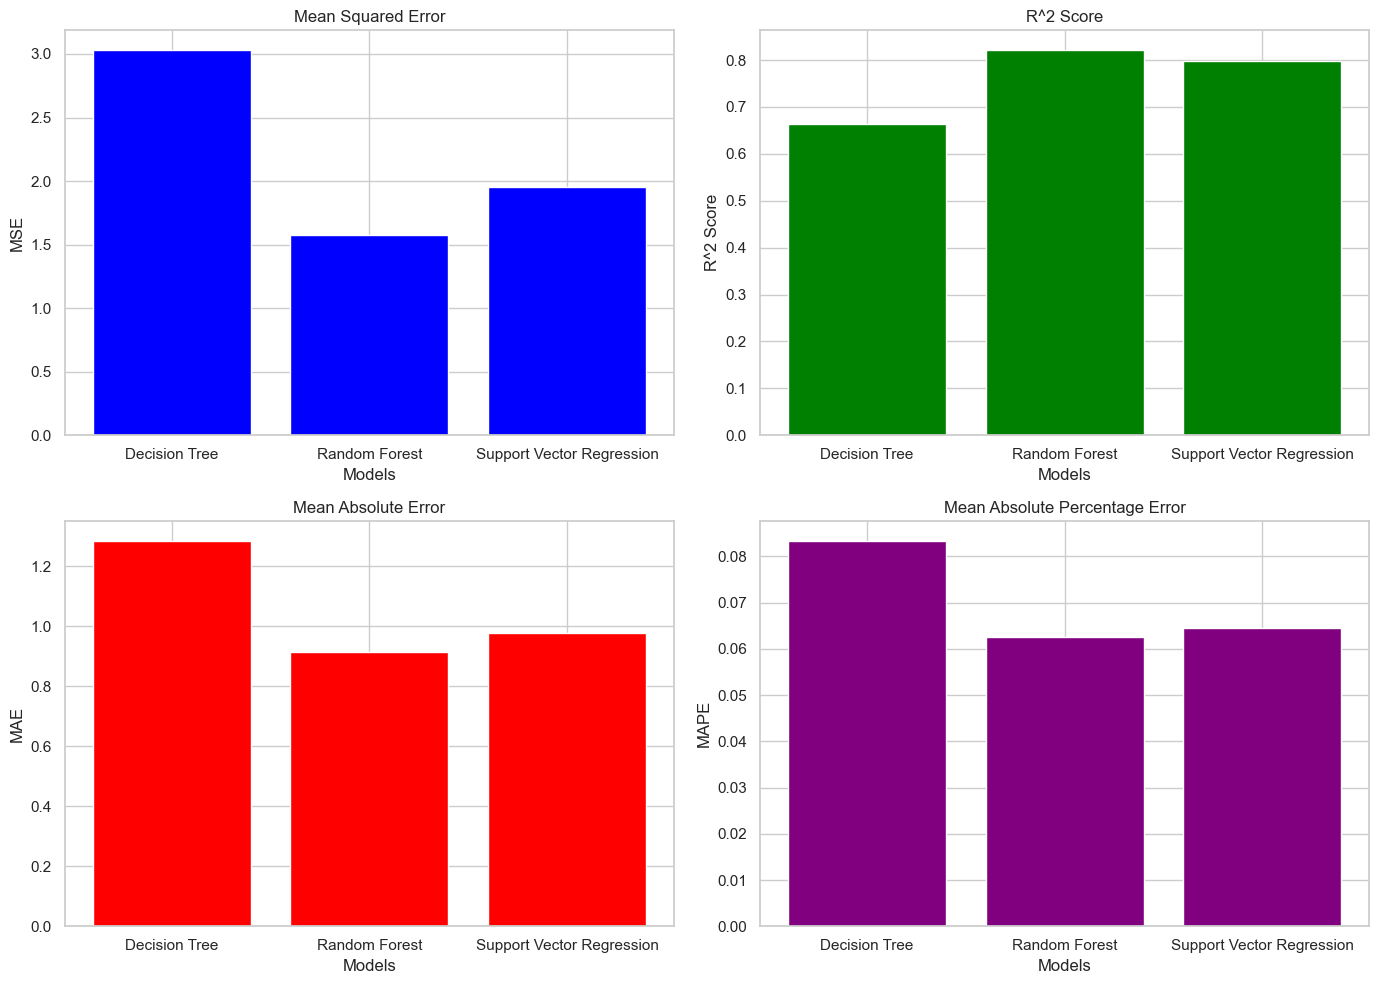

In [85]:
import matplotlib.pyplot as plt

# Data for plotting
models = ['Decision Tree', 'Random Forest', 'Support Vector Regression']
mse = [3.0345, 1.5781, 1.9538]  # Mean Squared Error
r2 = [0.6639, 0.8222, 0.7980]  # R^2 Score
mae = [1.2856, 0.9145, 0.9777]  # Mean Absolute Error
mape = [0.0834, 0.0626, 0.0646]  # Mean Absolute Percentage Error

fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# MSE plot
ax[0, 0].bar(models, mse, color='blue')
ax[0, 0].set_title('Mean Squared Error')
ax[0, 0].set_ylabel('MSE')
ax[0, 0].set_xlabel('Models')

# R^2 Score plot
ax[0, 1].bar(models, r2, color='green')
ax[0, 1].set_title('R^2 Score')
ax[0, 1].set_ylabel('R^2 Score')
ax[0, 1].set_xlabel('Models')

# MAE plot
ax[1, 0].bar(models, mae, color='red')
ax[1, 0].set_title('Mean Absolute Error')
ax[1, 0].set_ylabel('MAE')
ax[1, 0].set_xlabel('Models')

# MAPE plot
ax[1, 1].bar(models, mape, color='purple')
ax[1, 1].set_title('Mean Absolute Percentage Error')
ax[1, 1].set_ylabel('MAPE')
ax[1, 1].set_xlabel('Models')

plt.tight_layout()
plt.show()
